<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment

Check the datafame

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 0, '')

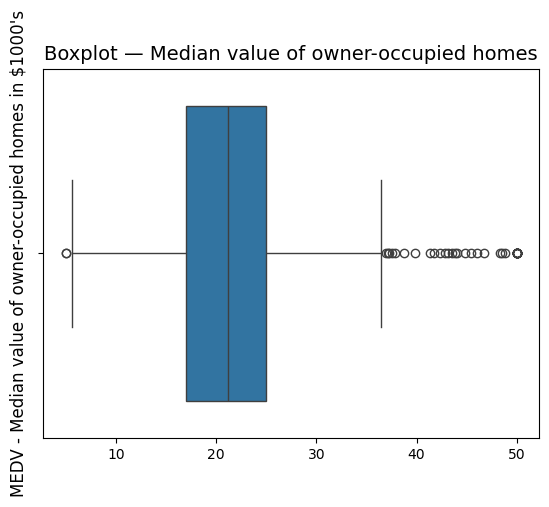

In [6]:
ax = sns.boxplot(x=boston_df["MEDV"])
ax.set_title("Boxplot — Median value of owner-occupied homes", fontsize=14)
ax.set_ylabel("MEDV - Median value of owner-occupied homes in $1000's", fontsize=12)
ax.set_xlabel("")  # no x label necessary for single horizontal boxplot

Provide a  bar plot for the Charles river variable

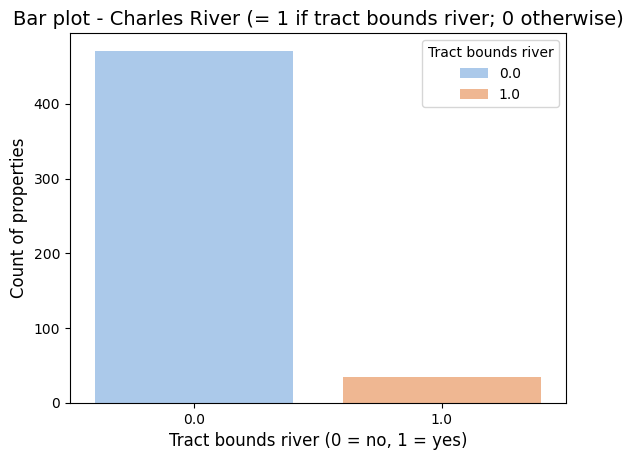

In [7]:
ax = sns.countplot(x=boston_df["CHAS"], palette="pastel", hue=boston_df["CHAS"])
ax.set_title("Bar plot - Charles River (= 1 if tract bounds river; 0 otherwise)", fontsize=14)
ax.set_xlabel("Tract bounds river (0 = no, 1 = yes)", fontsize=12)
ax.set_ylabel("Count of properties", fontsize=12)
ax.legend(title="Tract bounds river", loc="upper right")   

Provide a boxplot for the MEDV variable vs the AGE variable
(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0, 0.5, 'Age of owner for occupied homes')

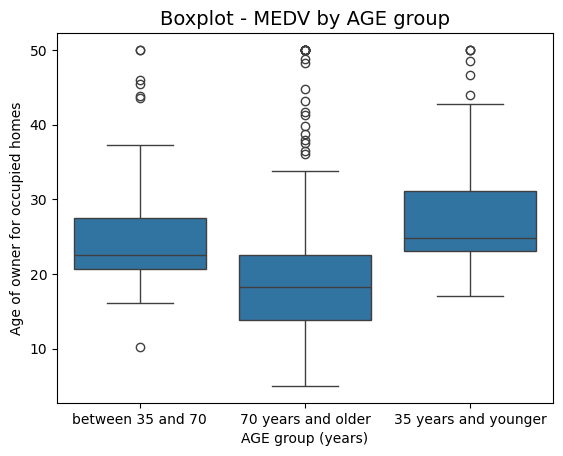

In [8]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df,)
ax.set_title("Boxplot - MEDV by AGE group", fontsize=14)
ax.set_xlabel("AGE group (years)", fontsize=10)
ax.set_ylabel("Age of owner for occupied homes", fontsize=10)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
What can you say about the relationship?

<AxesSubplot:title={'center':'NOX vs INDUS — Nitric oxide concentration vs non-retail business acres'}, xlabel='NOX', ylabel='INDUS'>

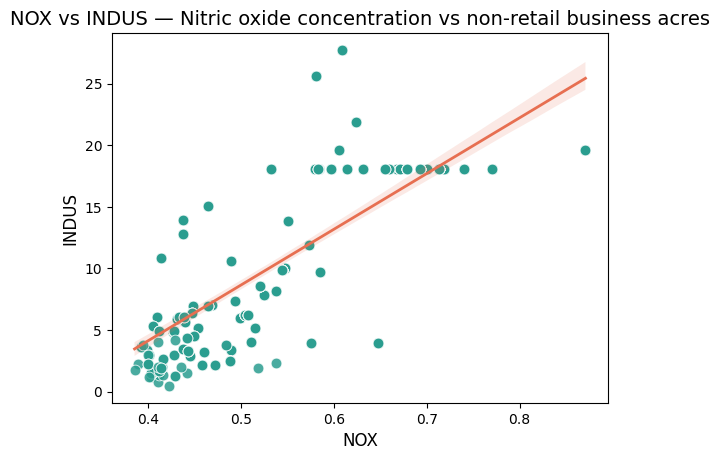

In [9]:
ax = sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'], data=boston_df, s=60, color="#2A9D8F", edgecolor="w", alpha=0.85)
ax.set_title("NOX vs INDUS — Nitric oxide concentration vs non-retail business acres", fontsize=14)
ax.set_xlabel("INDUS (proportion of non-retail business acres per town)", fontsize=12)
ax.set_ylabel("NOX (nitric oxides concentration, parts per 10 million)", fontsize=12)
# Add regression line
sns.regplot(x=boston_df['NOX'], y=boston_df['INDUS'], data=boston_df, scatter=False, ax=ax, color="#E76F51", line_kws={"linewidth":2})

Create a histogram for the pupil to teacher ratio variable

Text(0, 0.5, 'Count')

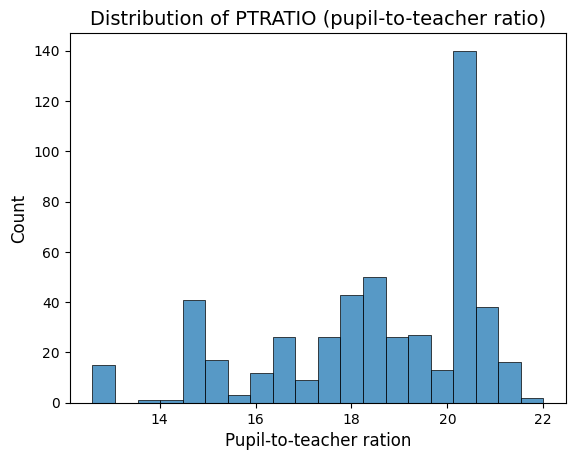

In [10]:
ax = sns.histplot(data=boston_df['PTRATIO'], bins=20, linewidth=0.5)
ax.set_title("Distribution of PTRATIO (pupil-to-teacher ratio)", fontsize=14)
ax.set_xlabel("Pupil-to-teacher ration", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

𝐻_0:µ_1=µ_2 There is no difference in median value of houses bounded by the Charles river

𝐻_1:µ_1≠µ_2 There is a difference in median value of houses bounded by the Charles river

α = 0.05

In [11]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

𝐻_0:µ_1=µ_2  There is no difference in median value of houses bounded by occupied units built prior to 1940
𝐻_1:µ_1≠µ_2  There is a difference in median value of houses bounded by occupied units built prior to 1940

α = 0.05

In [12]:
age1 = boston_df.loc[boston_df['age_group'] == '35 years and younger']['MEDV']
age2 = boston_df.loc[boston_df['age_group'] == 'between 35 and 70']['MEDV']
age3 = boston_df.loc[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(age1,age2,age3)
print(f'First method: \nF_Statistic: {f_statistic}, P-Value: {p_value}')

lm = ols('MEDV ~ age_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(f'\nRegression method: \n{table}')

First method: 
F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15

Regression method: 
              df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by occupied units built prior to 1940

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

𝐻_0: Nitric oxide concentrations are not correlated with the proportion of non-retail business acres per town
𝐻_1: Nitric oxide concentrations are not correlated with the proportion of non-retail business acres per town

α = 0.05

In [13]:
f_statistic, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'F_Statistic: {f_statistic}, P-Value: {p_value}')

F_Statistic: 0.7636514469209192, P-Value: 7.913361061210442e-98


Conclusion: Since the p-value is less than alpha value 0.05, we reject the Null hypothesis and conclude that there exists a relationship between NOX concentrations and the proportion of non-retail business acres per town

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

𝐻_0: µ_1=µ_2  The two population means are equal

𝐻_1: µ_1≠µ_2  The two population means are different

α = 0.05

In [14]:
lm = ols('DIS ~ MEDV', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(f'\nRegression method: \n{table}')


Regression method: 
             df       sum_sq     mean_sq         F        PR(>F)
MEDV        1.0   139.868826  139.868826  33.57957  1.206612e-08
Residual  504.0  2099.308819    4.165295       NaN           NaN


Conclusion: Since the p-value is less than alpha value 0.05, we reject the Null hypothesis and conclude that an additional weighted distance to the five Boston employment centres impacts the median value of owner occupied homes